In [1]:
%%capture

# Executing all command instructions beforehand 

# Flush all folders for fresh start
! rm -r /content/kitti_images

# Download images, with their semantic and instance labels
# Load them to repective lists. 
# folders :https://github.com/yanii/kitti-pcl/blob/master/KITTI_README.TXT

! mkdir kitti_images
! wget https://s3.eu-central-1.amazonaws.com/avg-projects/KITTI-360/data_2d_raw/2013_05_28_drive_0000_sync_image_00.zip -P /content/kitti_images
! wget https://s3.eu-central-1.amazonaws.com/avg-projects/KITTI-360/ed180d24c0a144f2f1ac71c2c655a3e986517ed8/data_2d_semantics.zip -P /content/kitti_images
! unzip /content/kitti_images/2013_05_28_drive_0000_sync_image_00.zip -d /content/kitti_images/2013_05_28_drive_0000_sync_image_00
! unzip /content/kitti_images/data_2d_semantics.zip -d /content/kitti_images/data_2d_semantics


# # # import libraries
import glob
import os

# # load images from image_02 folder (left rectified RGB images)
rgb_files = sorted(glob.glob(
    "/content/kitti_images/2013_05_28_drive_0000_sync_image_00/2013_05_28_drive_0000_sync/image_00/data_rect/*.png"))
print( len(rgb_files), 'of left rectified RGB images are loaded')

# # load images from image_02 folder (left rectified RGB images)
sem_rgb_files = sorted(glob.glob(
    "/content/kitti_images/data_2d_semantics/data_2d_semantics/train/2013_05_28_drive_0000_sync/semantic_rgb/*.png"))
print( len(sem_rgb_files), 'of left semantic RGB images are loaded')

# # load images from image_02 folder (left rectified RGB images)
sem_seg_files = sorted(glob.glob(
    "/content/kitti_images/data_2d_semantics/data_2d_semantics/train/2013_05_28_drive_0000_sync/semantic/*.png"))
print( len(sem_seg_files), 'of left semantic labelled images are loaded')

# # load images from image_02 folder (left rectified RGB images)
instance_files = sorted(glob.glob(
    "/content/kitti_images/data_2d_semantics/data_2d_semantics/train/2013_05_28_drive_0000_sync/instance/*.png"))
print( len(instance_files), 'of left instance labelled RGB images are loaded')

Streaming output truncated to the last 5000 lines.
  inflating: /content/kitti_images/data_2d_semantics/data_2d_semantics/train/2013_05_28_drive_0009_sync/instance/0000008674.png  
  inflating: /content/kitti_images/data_2d_semantics/data_2d_semantics/train/2013_05_28_drive_0009_sync/instance/0000008675.png  
  inflating: /content/kitti_images/data_2d_semantics/data_2d_semantics/train/2013_05_28_drive_0009_sync/instance/0000008676.png  
  inflating: /content/kitti_images/data_2d_semantics/data_2d_semantics/train/2013_05_28_drive_0009_sync/instance/0000008677.png  
  inflating: /content/kitti_images/data_2d_semantics/data_2d_semantics/train/2013_05_28_drive_0009_sync/instance/0000008678.png  
  inflating: /content/kitti_images/data_2d_semantics/data_2d_semantics/train/2013_05_28_drive_0009_sync/instance/0000008679.png  
  inflating: /content/kitti_images/data_2d_semantics/data_2d_semantics/train/2013_05_28_drive_0009_sync/instance/0000008680.png  
  inflating: /content/kitti_images/data

In [2]:

# # import libraries
import glob
import os

# load images from image_02 folder (left rectified RGB images)
rgb_files = sorted(glob.glob(
    "/content/kitti_images/2013_05_28_drive_0000_sync_image_00/2013_05_28_drive_0000_sync/image_00/data_rect/*.png"))
print( len(rgb_files), 'of left rectified RGB images are loaded')

# load images from image_02 folder (left rectified RGB images)
sem_rgb_files = sorted(glob.glob(
    "/content/kitti_images/data_2d_semantics/data_2d_semantics/train/2013_05_28_drive_0000_sync/semantic_rgb/*.png"))
print( len(sem_rgb_files), 'of left semantic RGB images are loaded')

# load images from image_02 folder (left rectified RGB images)
sem_seg_files = sorted(glob.glob(
    "/content/kitti_images/data_2d_semantics/data_2d_semantics/train/2013_05_28_drive_0000_sync/semantic/*.png"))
print( len(sem_seg_files), 'of left semantic labelled images are loaded')

# load images from image_02 folder (left rectified RGB images)
instance_files = sorted(glob.glob(
    "/content/kitti_images/data_2d_semantics/data_2d_semantics/train/2013_05_28_drive_0000_sync/instance/*.png"))
print( len(instance_files), 'of left instance labelled RGB images are loaded')

11518 of left rectified RGB images are loaded
10348 of left semantic RGB images are loaded
10348 of left semantic labelled images are loaded
10348 of left instance labelled RGB images are loaded


[ 7  8  9 11 13 17 20 21 22 23 25 26 34 37]
[ 27  31  35  43  50  66  78  82  85  89  97 101 102 133 144]


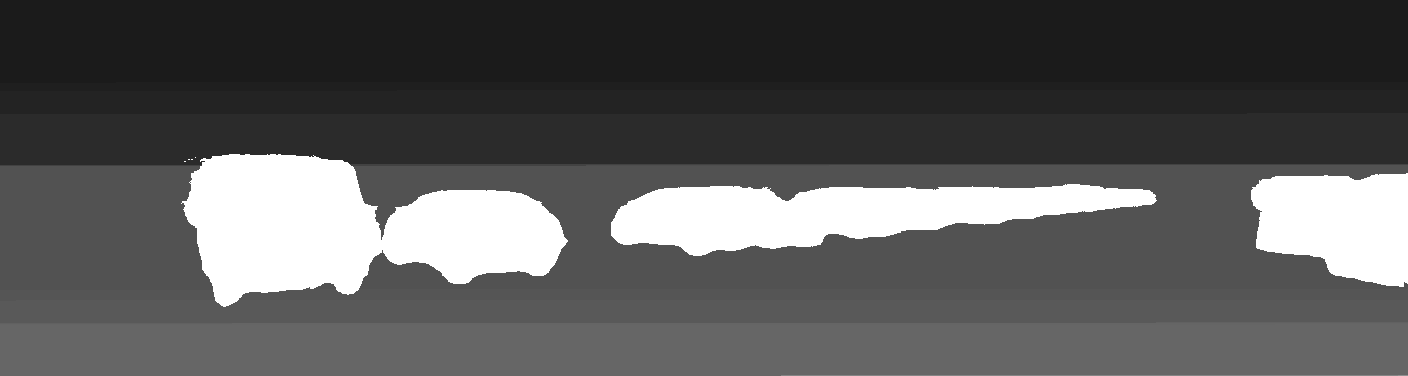

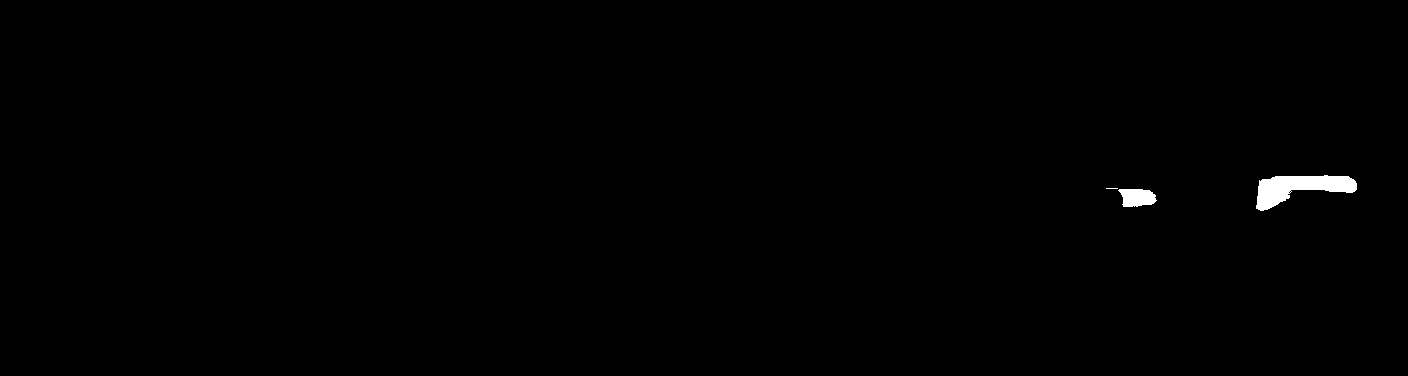

In [3]:
import cv2
import numpy as np

img_name = '0000002097.png'
img_sem_rgb = cv2.imread('/content/kitti_images/data_2d_semantics/data_2d_semantics/train/2013_05_28_drive_0000_sync/semantic_rgb/'+img_name)
img_sem = cv2.imread('/content/kitti_images/data_2d_semantics/data_2d_semantics/train/2013_05_28_drive_0000_sync/semantic/'+img_name)
img_ins = cv2.imread('/content/kitti_images/data_2d_semantics/data_2d_semantics/train/2013_05_28_drive_0000_sync/instance/'+img_name)
img = cv2.imread('/content/kitti_images/2013_05_28_drive_0000_sync_image_00/2013_05_28_drive_0000_sync/image_00/data_rect/'+img_name)

print(np.unique(img_sem))
print(np.unique(img_ins))


# here point to be noteed is that poles(17), small poles(37) and polegroup(18) are having same color in sem_seg_rgb

# so while comparing them I should use the ID which is 17 and 

# print(type(img_sem[0][10]))
# segmentation_poles = np.empty_like(img_sem_rgb)
# segmentation_poles = np.where( (img_sem_rgb == 153),255,segmentation_poles)

segmentation_poles = np.empty_like(img_sem)
segmentation_poles = np.where( (img_sem == 26),255,segmentation_poles)
from google.colab.patches import cv2_imshow
cv2_imshow(segmentation_poles)

ins_poles = np.zeros_like(img_ins)
ins_poles = np.where( (img_ins == 101), 255, ins_poles )
cv2_imshow(ins_poles)

# Semantic Segmentation Work

Usually for localization algorithms we need static objects and so Generating YOLO labels for static using instance masks


Localizing static algorithms 

TODO: 


1. Write a piece of code which checks in each box which pixels belongs to maximum class 

2. get the class also with a single piece of code
perform detection for each and each class in loop simply

  like first loop for car

  second for person

  third for poles

  fourth for van

  fifth for truck

3. pass the classes to be detected as list

4. draw this bounding boxes either using manually or pip yolov4

5. use dictionary, that if person the lower range is x and upper range is x+10

6. inform that same can be send to yolact training 

Proposed Bounding Boxes:  7
Filtered Bounding Boxes:  4


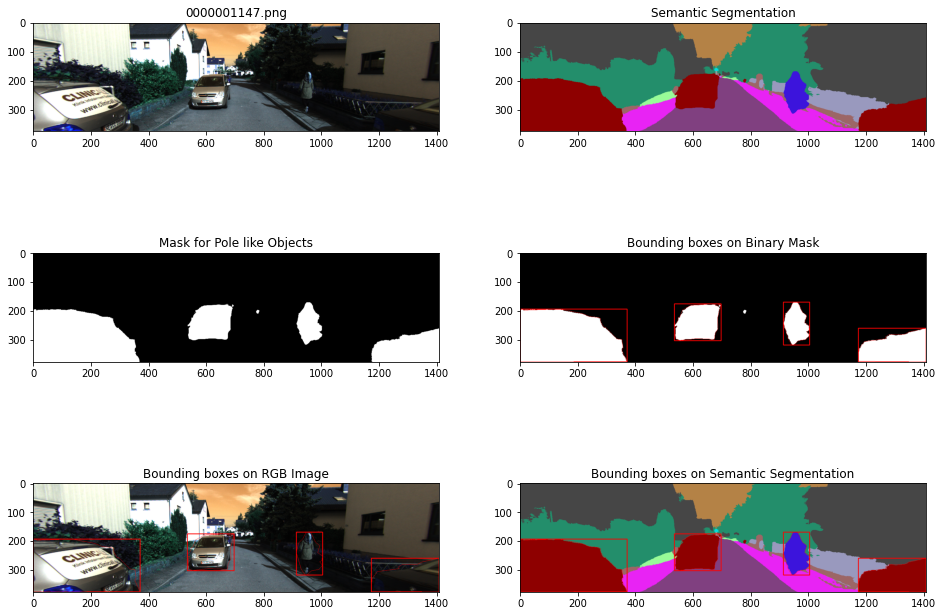

In [4]:
from __future__ import print_function

import cv2
import numpy as np9
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random as rng
import glob
import os

def pipeline(cv_image, rgb_sem_seg, ins_img, 
             min_wd_bounding_box, min_ht_bounding_box):
    
    cv_image = cv_image
    cv_image_sem_seg = rgb_sem_seg
    
    rgb_imge = cv_image.copy()
    sem_seg_image = cv_image_sem_seg.copy()

    ins_poles = np.zeros_like(img_ins)
    # ins_poles = np.where( np.logical_and (img_ins >= 60, img_ins < 70) , 255, ins_poles ) # poles
    ins_poles = np.where( np.logical_and (img_ins >= 100, img_ins < 111)  , 255, ins_poles ) # cars
    ins_poles = np.where( np.logical_and (img_ins >= 90, img_ins < 100)  , 255, ins_poles ) # pedestrians
    pole_mask = ins_poles

    # pole_mask = pole_mask.astype(int)*255 # ref: https://stackoverflow.com/a/62965189
    pole_mask = np.uint8(pole_mask,)
    # kernel = np.ones((5, 5), 'uint8')
    # pole_mask = cv2.dilate(pole_mask, kernel, iterations=1)
    src = cv2.blur(pole_mask, (3,3))

    # Bounding boxes using sem_seg images and contours
    # ref : https://docs.opencv.org/3.4/da/d0c/tutorial_bounding_rects_circles.htm
    
    # without canny to reduce double count
    contours,_ = cv2.findContours(src[:,:,0], cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    contours_poly = [None]*len(contours)
    boundRect = [None]*len(contours)

    for i, c in enumerate(contours):
        contours_poly[i] = cv2.approxPolyDP(c, 3, True)
        boundRect[i] = cv2.boundingRect(contours_poly[i])
    
    drawing = np.zeros((src.shape[0],\
                        src.shape[1], 3), dtype=np.uint8)

    drawing = pole_mask.copy()
    filtered_boundRect = []
    for i in range(len(contours)):

        if ( int(boundRect[i][3]) > min_ht_bounding_box and 
            int(boundRect[i][2]) > min_wd_bounding_box ): 
            filtered_boundRect.append(boundRect[i])
            x1 = int(boundRect[i][0]) # start_x
            y1 = int(boundRect[i][1]) # start_y
            x2 = int( boundRect[i][0] + boundRect[i][2]) # end_x
            y2 = int(boundRect[i][1] + boundRect[i][3] ) # end_y
            # width of bbox = boundRect[i][2]
            # height of bbox =  boundRect[i][3] 
            
            color = (255,0,0)                       
            # bb on binary map
            cv2.drawContours(drawing, contours_poly, i, color)
            cv2.rectangle(drawing, ( x1, y1), ( x2, y2), color, 2)
            # bb on rgb image map
            cv2.drawContours(cv_image, contours_poly, i, color)
            cv2.rectangle(cv_image, ( x1, y1), ( x2, y2), color, 2)
            # bb on sem seg
            cv2.rectangle(cv_image_sem_seg, ( x1, y1), ( x2, y2), color, 2)
            cv2.drawContours(cv_image_sem_seg, contours_poly, i, color)
            
            # print('class: poles')
            # print('center_x:', ((x1 + boundRect[i][2]*0.5)/cv_image.shape[1]), 'center_y:', (y1 + boundRect[i][3]*0.5)/cv_image.shape[0])
            # print('width:', (boundRect[i][2]/cv_image.shape[1]))
            # print('height:',(boundRect[i][3]/cv_image.shape[0]))
            # np.array([[ 0.109895, 0.734685, 0.0458333, 0.267384, 1., .80]] # for yolov4 a sample output
    return  rgb_imge, sem_seg_image, pole_mask, cv_image, drawing, cv_image_sem_seg, contours, contours_poly, boundRect, filtered_boundRect


min_ht_bounding_box = 15
min_wd_bounding_box = 15

'''
KITTI dataset: ref: # https://github.com/autonomousvision/kitti360Scripts/blob/master/kitti360scripts/helpers/labels.py
class             id    kittiId  color
'pole'          , 17 ,  21,     (153,153,153)
'smallpole'     , 37 ,  22,     (153,153,153)
'traffic light' , 19 ,  23,     (250,170, 30)
'traffic sign'  , 20 ,  24,     (220,220,  0)
'person'        , 24 ,  19,     (220, 20, 60)
'rider'         , 25 ,  20,     (255,  0,  0)
'car'           , 26 ,  13,     (  0,  0,142)
'truck'         , 27 ,  14,     (  0,  0, 70)
'bus'           , 28 ,  34,     (  0, 60,100)
'caravan'       , 29 ,  16,     (  0,  0, 90)
'trailer'       , 30 ,  15,     (  0,  0,110)
'train'         , 31 ,  33,     (  0, 80,100)
'motorcycle'    , 32 ,  17,     (  0,  0,230)
'bicycle'       , 33 ,  18,     (119, 11, 32)
'''

'''
result tuple: 
rgb_image, sem_seg_image, pole_mask, bb_rgb, bb_binary,
bb_sem_seg, contours, contours_poly, boundRect, filtered_boundRect
'''

im_name = '0000001147.png'

img_sem_rgb = cv2.imread('/content/kitti_images/data_2d_semantics/data_2d_semantics/train/2013_05_28_drive_0000_sync/semantic_rgb/'+ im_name)
img_sem = cv2.imread('/content/kitti_images/data_2d_semantics/data_2d_semantics/train/2013_05_28_drive_0000_sync/semantic/'+im_name)
img_ins = cv2.imread('/content/kitti_images/data_2d_semantics/data_2d_semantics/train/2013_05_28_drive_0000_sync/instance/'+im_name)
img = cv2.imread('/content/kitti_images/2013_05_28_drive_0000_sync_image_00/2013_05_28_drive_0000_sync/image_00/data_rect/'+im_name)

result = pipeline( img, img_sem_rgb, img_ins,
                  min_wd_bounding_box, min_ht_bounding_box)

fig, axarr = plt.subplots(3,2,figsize=(16,12))
# Input Image
axarr[0, 0].imshow(result[0])
axarr[0, 0].set_title(im_name)
# Semantic Segmentation 
axarr[0, 1].imshow(result[1])
axarr[0, 1].set_title('Semantic Segmentation')
# Mask for Pole like Objects
axarr[1,0].imshow(result[2])
axarr[1, 0].set_title('Mask for Pole like Objects')
# Bounding Box outputs
axarr[1,1].imshow(result[4])
axarr[1, 1].set_title('Bounding boxes on Binary Mask')
axarr[2, 0].imshow(result[3])
axarr[2, 0].set_title('Bounding boxes on RGB Image')
axarr[2, 1].imshow(result[5])
axarr[2, 1].set_title('Bounding boxes on Semantic Segmentation')
print('Proposed Bounding Boxes: ', len(result[8]))
print('Filtered Bounding Boxes: ', len(result[9]))